Refer here for instructions to [download and run this sample locally](https://developers.arcgis.com/python/sample-notebooks/#Download-and-run-the-sample-notebooks) on your computer

# Publishing web maps and web scenes

An ArcGIS web map is an interactive display of geographic information through a composition of web layers, basemap and much more. A web scene is analogous to a web map but in the 3D space. To get and overview, visit the product documentation for [web maps](http://doc.arcgis.com/en/arcgis-online/reference/what-is-web-map.htm) and [web scenes](http://doc.arcgis.com/en/arcgis-online/reference/what-is-web-scene.htm).

Web maps and scenes are stored as items on your portal and their content is in JavaScript Object Notation (JSON), a text format that can easily be transferred, stored, and edited. This sample demonstrates how to create and publish simple examples of web maps and scenes. If you are interested in learning more about the specification to author and publish complex and more illustrative maps, refer to this [documentation](https://developers.arcgis.com/web-map-specification/).

In [1]:
import os
import json
from IPython.display import display
from arcgis import GIS
import arcgis.viz

# connect to your GIS
gis = GIS("portal or org url","username","password")

# Publish a web map
For this sample, we will read a simple web map json from a text file and use that to publish a web map item.

In [2]:
# Read sample web map json from text file. We use built in json module to parse it into a Python dictionary
web_map_dict = dict()
with open("./data/web_map_simple.json","r") as file_handle:
    web_map_dict = json.load(file_handle)

display(web_map_dict)

{'baseMap': {'baseMapLayers': [{'id': 'defaultBasemap',
    'layerType': 'ArcGISTiledMapServiceLayer',
    'opacity': 1,
    'title': 'World Topographic Map',
    'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
    'visibility': True}],
  'title': 'Topographic'},
 'operationalLayers': [{'itemId': '',
   'layerType': '',
   'opacity': 1,
   'title': '',
   'url': '',
   'visibility': True}],
 'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'version': '2.5'}

The above represents a template of a simple web map json. This web map consists of a basemap web layer and an array of operational web layers. Notice the opertaional layer is empty without any web layer urls. We will search for a public web layer titled **2012 USA Median Age** published by **esri** account and apply that as an operational layer for this web map.

In [3]:
search_result = gis.content.search("title:2012 USA Median Age AND owner:esri", 
                                   item_type = "Map Service", outside_org = True)

In [4]:
display(search_result)

[<Item title:"2012 USA Median Household Income (Mature Support)" type:Map Service owner:esri>,
 <Item title:"2012 USA Median Age (Mature Support)" type:Map Service owner:esri>,
 <Item title:"2012 USA Median Home Value (Mature Support)" type:Map Service owner:esri>,
 <Item title:"2012 USA Median Net Worth (Mature Support)" type:Map Service owner:esri>]

<Item title:"2012 USA Median Age (Mature Support)" type:Map Service owner:esri>
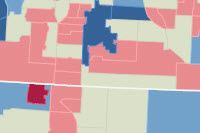

In [5]:
median_age_weblayer = search_result[1] #pick the second search result
display(median_age_weblayer)

### Add an operational layer to the web map
To add 'USA median age' web layer as an operational layer, we update that part of the web map dictionary with the item id and url of the web layer.

In [6]:
web_map_dict['operationalLayers'][0]['itemId'] = median_age_weblayer.itemid
web_map_dict['operationalLayers'][0]['layerType'] = "ArcGISMapServiceLayer"
web_map_dict['operationalLayers'][0]['title'] = median_age_weblayer.title
web_map_dict['operationalLayers'][0]['url'] = median_age_weblayer.url

In [7]:
# display the updated web map dictionary
display(web_map_dict)

{'baseMap': {'baseMapLayers': [{'id': 'defaultBasemap',
    'layerType': 'ArcGISTiledMapServiceLayer',
    'opacity': 1,
    'title': 'World Topographic Map',
    'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
    'visibility': True}],
  'title': 'Topographic'},
 'operationalLayers': [{'itemId': 'fce0ca8972ae4268bc4a69443b8d1ef5',
   'layerType': 'ArcGISMapServiceLayer',
   'opacity': 1,
   'title': '2012 USA Median Age (Mature Support)',
   'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/Demographics/USA_Median_Age/MapServer',
   'visibility': True}],
 'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'version': '2.5'}

### Publish the web map as an item to the portal
Now that the web map content is ready, we will use the `add()` method to create a new web map item. As parameters to the `add()` method, we need to specify some essential properties for the new web map item. The `text` property of the item holds the web map content. Since our web map content is in the form of a Python dictionary, we use `dumps()` function on `json` module to convert the dictionary to a string.

In [8]:
web_map_properties = {'title':'USA median age map',
                     'type':'Web Map',
                     'snippet':'This map service shows the median age of people' +\
                     'in the United States as of 2012 census. The Median Age for' +\
                      'the U.S. is 37 years of age.',
                     'tags':'ArcGIS Python API',
                     'text':json.dumps(web_map_dict)}

# Call the add() with web map item's properties and content.
web_map_item = gis.content.add(web_map_properties)
display(web_map_item)

<Item title:"USA median age map" type:Web Map owner:atma.mani>

### Display the web map
We have successfully published a web map with consisting of a basemap and desired web layer as the operational layer. We will use `arcgis.viz` module to read the published map as a `WebMap` object and interact with it.

In [9]:
web_map_obj = arcgis.viz.WebMap(web_map_item)

# display the web map in an interactive widget
web_map_obj

The map by zooms to the extent of the content by default. You can interact with the widget and explore the spatial distribution of people's age.

# Publish a web scene
So far, we have seen how to publish a web map. The steps to publish a web scene is identical and will be demonstrated in this part of the sample. We will read a template web scene json from a text file, add an interesting 3D Scene Service as an operational layer. Then using the `add()` method, we will publish this as a web scene item.

In [10]:
# Read sample web scene json from text file. We use built-in json module to parse it into a Python dictionary
web_scene_dict = dict()
with open("./data/web_scene_simple.json","r") as file_handle:
    web_scene_dict = json.load(file_handle)

display(web_scene_dict)

{'baseMap': {'baseMapLayers': [{'id': '933075fa973f49948a88b84dae743704',
    'layerDefinition': {},
    'layerType': 'ArcGISTiledMapServiceLayer',
    'opacity': 1,
    'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer',
    'visibility': True}],
  'elevationLayers': [{'id': 'globalElevation_0',
    'layerType': 'ArcGISTiledElevationServiceLayer',
    'url': 'https://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer'}],
  'title': 'World Street Map'},
 'operationalLayers': [{'itemId': '',
   'layerType': '',
   'opacity': 1,
   'title': '',
   'url': '',
   'visibility': True}],
 'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'tables': [],
 'version': '1.4',
 'viewingMode': 'global'}

Similar to the web map template, the web scene above is pretty simple. Notice the `operationalLayers` array does not contain `url` to the service. Now we will search for a scene service titled **Montreal, Canada Buildings** published by **esri_3d** and apply that to the web scene.

In [11]:
search_result = gis.content.search("title:Montreal, Canada Buildings AND owner:esri_3d", 
                                   item_type="scene service", outside_org = True)
display(search_result)

[<Item title:"Montreal, Canada Buildings" type:Scene Service owner:esri_3d>]

<Item title:"Montreal, Canada Buildings" type:Scene Service owner:esri_3d>
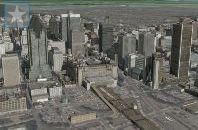

In [12]:
buildings_layer = search_result[0]
display(buildings_layer)

In [13]:
# Update web scene's opertaional layer with properties of buildings_layer
web_scene_dict['operationalLayers'][0]['itemId'] = buildings_layer.itemid
web_scene_dict['operationalLayers'][0]['layerType'] = "ArcGISSceneServiceLayer"
web_scene_dict['operationalLayers'][0]['title'] = buildings_layer.title
web_scene_dict['operationalLayers'][0]['url'] = buildings_layer.url

### Publish the web scene as an item to the portal
Similar to publishing the web map, we will use the `add()` method to create a web scene item. As parameters we will send a dictionary containing properties of the web scene item. The `text` property will contain the web scene dictionary updated in the previous step as a string.

In [14]:
web_scene_item_properties = {'title':'Web scene with photo realistic buildings',
                            'type':'Web Scene',
                            'snippet':'This scene highlights buildings of Montreal, Canada',
                            'tags':'ArcGIS Python API',
                            'text': json.dumps(web_scene_dict)}

# Use the add() method to publish a new web scenej
web_scene_item = gis.content.add(web_scene_item_properties)
display(web_scene_item)

<Item title:"Web scene with photo realistic buildings" type:Web Scene owner:atma.mani>

### Display the web scene
We have successfully published a web scene with consisting of a basemap, elevation layer and desired web layer as the operational layer. We will use arcgis.viz module to read the published scene as a `WebScene` object and interact with it.

In [15]:
web_scene_obj = arcgis.viz.WebScene(web_scene_item)

# display the web scene in an interactive widget
web_scene_obj

WebScene([('operationalLayers',
           [{'itemId': 'f4b4881270124343a4cc2f847f86f54c',
             'layerType': 'ArcGISSceneServiceLayer',
             'opacity': 1,
             'title': 'Montreal, Canada Buildings',
             'url': 'http://scene.arcgis.com/arcgis/rest/services/Hosted/Buildings_Montreal/SceneServer',
             'visibility': True}]),
          ('tables', []),
          ('baseMap',
           {'baseMapLayers': [{'id': '933075fa973f49948a88b84dae743704',
              'layerDefinition': {},
              'layerType': 'ArcGISTiledMapServiceLayer',
              'opacity': 1,
              'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer',
              'visibility': True}],
            'elevationLayers': [{'id': 'globalElevation_0',
              'layerType': 'ArcGISTiledElevationServiceLayer',
              'url': 'https://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer'}],
            'title': 'World Street Map'}),
          ('version', '1.4'),
          ('viewingMode', 'global'),
          ('spatialReference', {'latestWkid': 3857, 'wkid': 102100})])